In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import rgb2hex
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import shapely

In [3]:
trees = pd.read_csv('TreePop.csv',index_col = 0)#load data
trees.set_index('State', inplace=True) #drop state id, won't use here (probably could combine with above line)

In [4]:
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='50m',category='cultural', name=shapename)

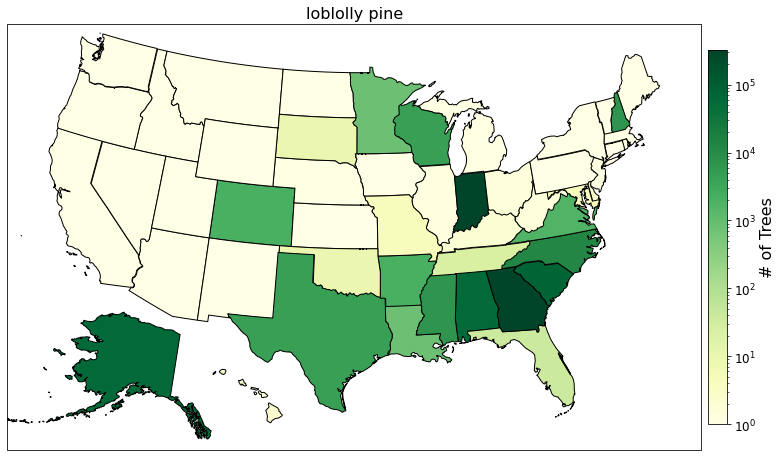

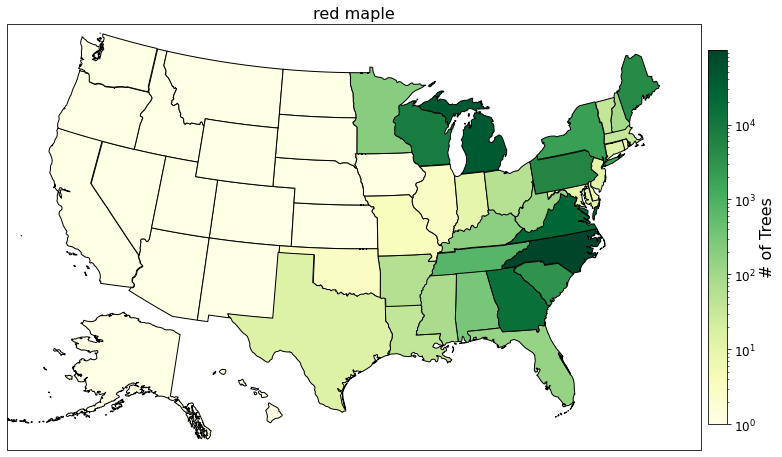

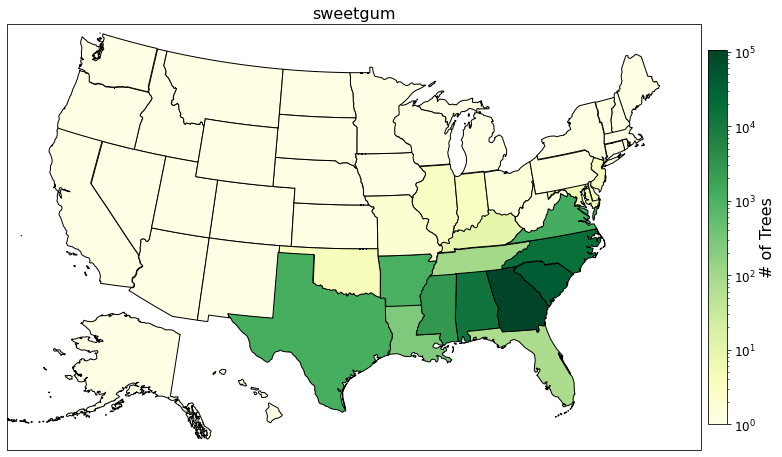

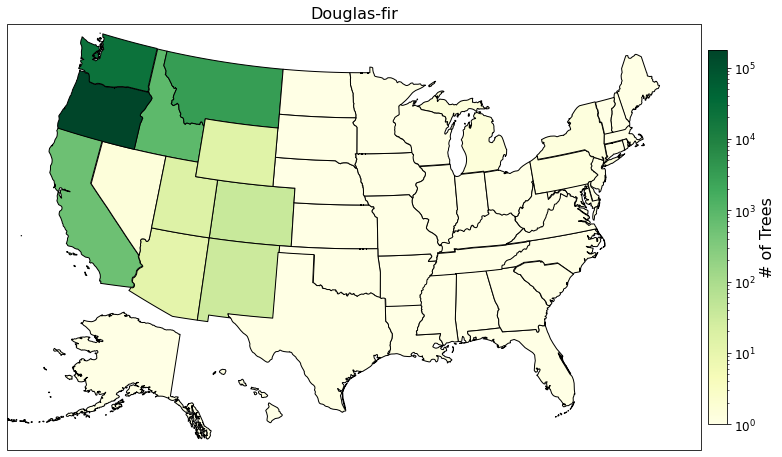

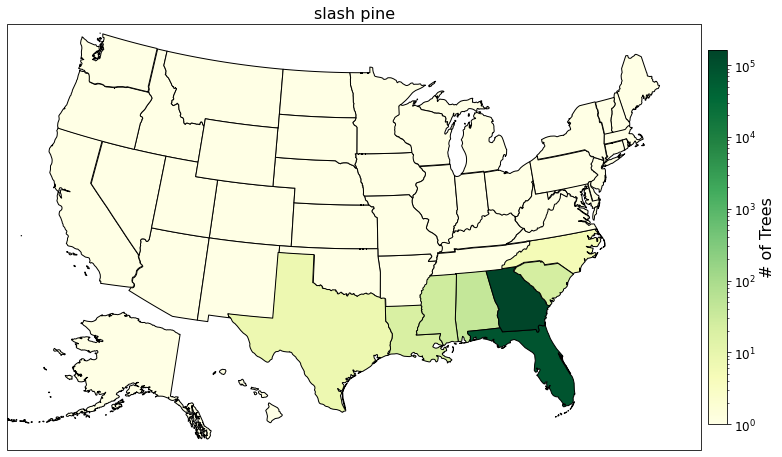

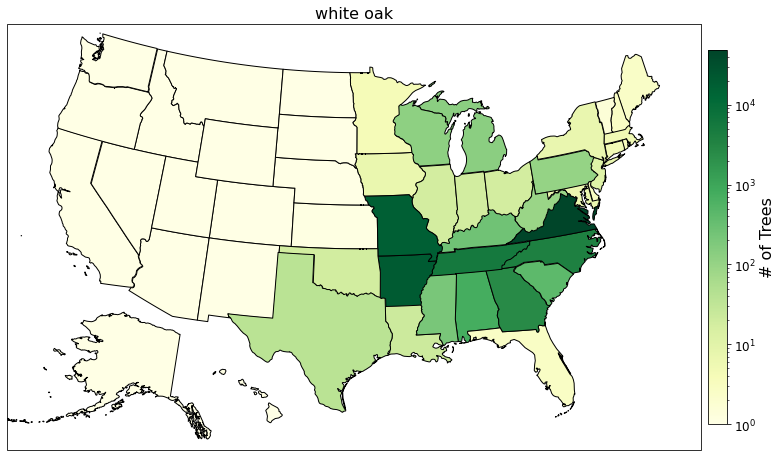

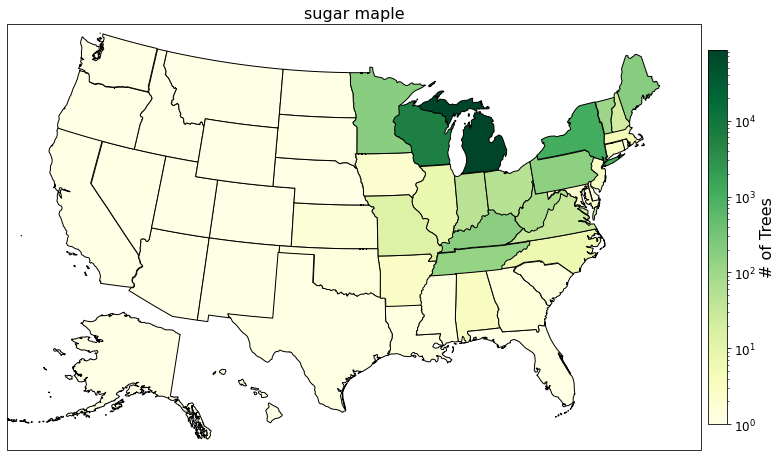

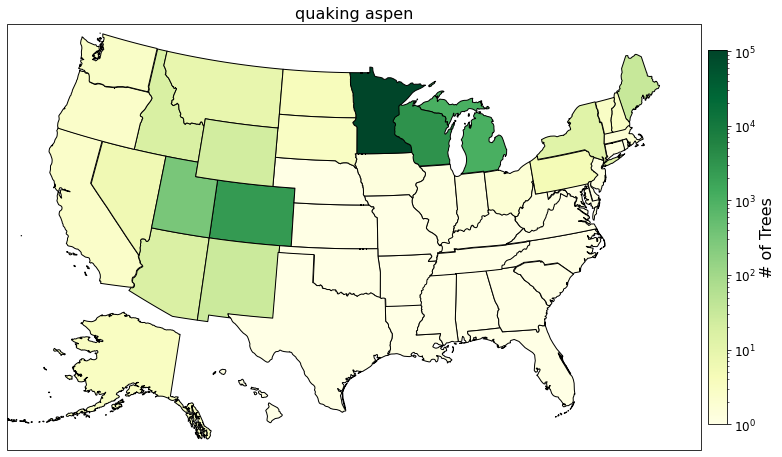

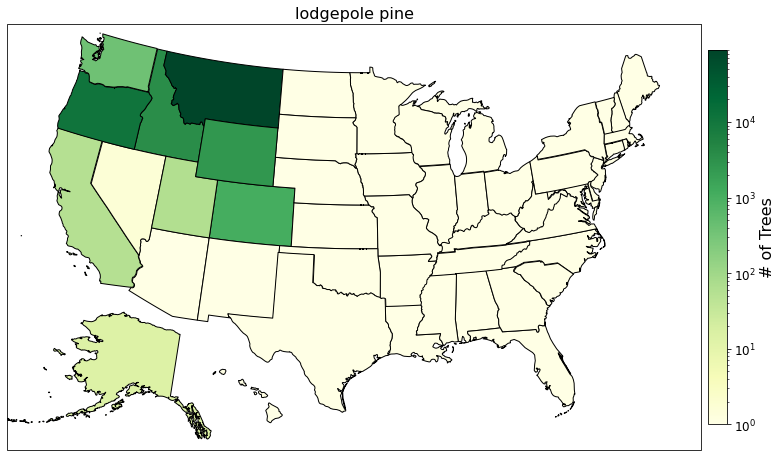

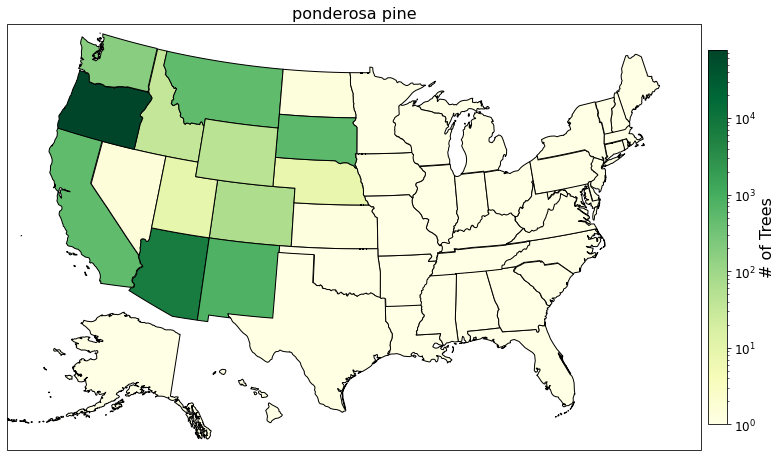

In [12]:
cmap = plt.cm.YlGn # use 'YlGn' colormap
for species in trees.columns: #make a plot for each tree type (I guess I could use subplots...)
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    #ax.set_extent([-119, -64, 22, 49], ccrs.Geodetic()) #only plot US map
    ax.set_extent([-121, -72, 21, 50], ccrs.Geodetic()) #only plot US map

    #ax.outline_patch.set_visible(False) #need to find solution to this, depreciated

    ax.set_title(species, fontsize = 16)
    vmin = 1; vmax = trees[species].max() # set range.

    for astate in shpreader.Reader(states_shp).records():
        try:
            # use the name of this state to get pop_density
            state_dens = trees.loc[astate.attributes['name']][species]
            if state_dens < 1:
                state_dens = 1
            geo = [astate.geometry]

            if astate.attributes['name'] == 'Alaska':
                geo = list(map(lambda x: shapely.affinity.scale(x, xfact=0.3, yfact=0.45), [astate.geometry]))
                geo = list(map(lambda x: shapely.affinity.translate(x,xoff=40, yoff=-35), geo))
            if astate.attributes['name'] == 'Hawaii':
                geo = list(map(lambda x: shapely.affinity.translate(x,xoff=53, yoff=6), geo))
        except:
            continue
        color = rgb2hex(cmap(((state_dens-vmin)/(vmax-vmin))**0.5)[:3])

        #`astate.geometry` is the polygon to plot
        ax.add_geometries(geo, ccrs.PlateCarree(),
                          facecolor=color, edgecolor='black')
    cbar = fig.colorbar(cm.ScalarMappable(norm=LogNorm(vmin=vmin, vmax=vmax), cmap=cmap),
                        ax=ax,fraction=0.026,pad = 0.01)
    cbar.set_label('# of Trees',fontsize = 16)
    #cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=12) 

plt.show()